In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from statsmodels.formula.api import logit
import numpy as np

In [ ]:
# Load the dataset and show the first few rows
asthma_data = pd.read_csv('current_asthma_subset4.csv')

asthma_data.head()

,AGEP_A,SEX_A,EDUCP_A,EMPWRKLSW1_A,RATCAT_A,ASTILL_A,NOTCOV_A,USUALPL_A,ASAT12M_A,ASER12M_A,...,REGION,URBRRL,EDUCATION_CAT,INCOME_CAT,FPL_CAT,RACE_CAT,REGION_CAT,URBRRL_CAT,CAREPL_CAT,EMPLOYMENT_CAT
0,69.0,Female,"Bachelor's degree (Example: BA, AB, BS, BBA)",Yes,5.00 or greater,Yes,Covered,Yes,Yes,No,...,3,3,Bachelor's degree or higher,400% or greater,High-income,White,South,Urban,Yes,Employed
1,52.0,Male,Associate degree: academic program,Yes,1.50 - 1.74,Yes,Covered,Yes,No,No,...,3,2,Some college or associate degree,100-199%,Low-income,White,South,Urban,Yes,Employed
2,64.0,Female,Associate degree: academic program,Yes,2.50 - 2.99,Yes,Covered,Yes,No,No,...,3,1,Some college or associate degree,200-299%,Middle-income,White,South,Urban,Yes,Employed
3,60.0,Male,"Some college, no degree",No,5.00 or greater,Yes,Covered,Yes,No,No,...,2,4,Some college or associate degree,400% or greater,High-income,White,Midwest,Rural,Yes,Unemployed
4,21.0,Female,"Some college, no degree",Yes,4.00 - 4.49,Yes,Covered,There is MORE THAN ONE place,No,No,...,1,1,Some college or associate degree,400% or greater,High-income,Asian,Northeast,Urban,Yes,Employed


In [ ]:
# View contents of the dataframe
asthma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7524 entries, 0 to 7523
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AGEP_A          7516 non-null   float64
 1   SEX_A           7522 non-null   object 
 2   EDUCP_A         7524 non-null   object 
 3   EMPWRKLSW1_A    7524 non-null   object 
 4   RATCAT_A        7524 non-null   object 
 5   ASTILL_A        7524 non-null   object 
 6   NOTCOV_A        7524 non-null   object 
 7   USUALPL_A       7524 non-null   object 
 8   ASAT12M_A       7511 non-null   object 
 9   ASER12M_A       7519 non-null   object 
 10  HISPALLP_A      7524 non-null   object 
 11  adj_wtfa_a      7524 non-null   float64
 12  PSTRAT          7524 non-null   int64  
 13  PPSU            7524 non-null   int64  
 14  REGION          7524 non-null   int64  
 15  URBRRL          7524 non-null   int64  
 16  EDUCATION_CAT   7488 non-null   object 
 17  INCOME_CAT      7524 non-null   o

In [ ]:
# Find null values of the data frame
asthma_data.isnull().sum()

,0
AGEP_A,8
SEX_A,2
EDUCP_A,0
EMPWRKLSW1_A,0
RATCAT_A,0
ASTILL_A,0
NOTCOV_A,0
USUALPL_A,0
ASAT12M_A,13
ASER12M_A,5


In [ ]:
# Remove all the null values of this data frame
asthma_data = asthma_data.dropna()

asthma_data.isnull().sum()

,0
AGEP_A,0
SEX_A,0
EDUCP_A,0
EMPWRKLSW1_A,0
RATCAT_A,0
ASTILL_A,0
NOTCOV_A,0
USUALPL_A,0
ASAT12M_A,0
ASER12M_A,0


In [ ]:
# Set ordered categories for independent variables

asthma_data['SEX_A'] = pd.Categorical(asthma_data['SEX_A'],
    categories = ['Male', 'Female'], ordered = True)

asthma_data['RACE_CAT'] = pd.Categorical(asthma_data['RACE_CAT'],
    categories = ['White',
                'Black or African American',
                'Asian',
                'Hispanic or Latino',
                'AIAN',
                'Other/Multiple Races'], ordered = True)

asthma_data['EDUCATION_CAT'] = pd.Categorical(asthma_data['EDUCATION_CAT'],
    categories = ['Less than high school',
                'High school diploma or GED',
                'Some college or associate degree',
                'Bachelor\'s degree or higher'], ordered = True)

asthma_data['INCOME_CAT'] = pd.Categorical(asthma_data['INCOME_CAT'],
    categories = ['<100%', '100-199%', '200-299%', '300-399%', '400% or greater'], ordered = True)

asthma_data['FPL_CAT'] = pd.Categorical(asthma_data['FPL_CAT'],
    categories = ['Poor', 'Low-income', 'Middle-income', 'High-income'], ordered = True)

asthma_data['REGION_CAT'] = pd.Categorical(asthma_data['REGION_CAT'],
    categories = ['Northeast', 'South', 'Midwest', 'West'], ordered = True)

In [ ]:
# Descriptive statistics of the study population (individuals with current asthma)

# Continuous variable: AGEP_A
age_mean = asthma_data['AGEP_A'].mean()
age_std = asthma_data['AGEP_A'].std()
print(f"Age (mean ± SD): {age_mean: .2f} ± {age_std: .2f}")

# Categorical variables - unweighted counts and weighted percentages
predictors = ['SEX_A', 'RACE_CAT', 'EDUCATION_CAT', 'INCOME_CAT', 'FPL_CAT', 'EMPLOYMENT_CAT', 'NOTCOV_A', 'CAREPL_CAT', 'REGION_CAT', 'URBRRL_CAT']
outcomes = ['ASAT12M_A', 'ASER12M_A']
weights = asthma_data['adj_wtfa_a']

for var in predictors:
  print(f"\nDescriptive statistics for {var}")

  print("N") # Unweighted counts
  print(asthma_data[var].value_counts(dropna = False))

  weighted_percent = (asthma_data.groupby(var)['adj_wtfa_a'].sum() / weights.sum() * 100)
  print("%")
  print(weighted_percent)

for outcome1 in outcomes:
  print(f"\nDescriptive statistics for {outcome1}")
  print("N") # Unweighted counts
  print(asthma_data[outcome1].value_counts(dropna = False))

Age (mean ± SD):  51.96 ±  18.10

Descriptive statistics for SEX_A
N
SEX_A
Female    4962
Male      2459
Name: count, dtype: int64
%
SEX_A
Male      37.084269
Female    62.915731
Name: adj_wtfa_a, dtype: float64

Descriptive statistics for RACE_CAT
N
RACE_CAT
White                        4966
Black or African American     998
Hispanic or Latino            911
Asian                         263
AIAN                          162
Other/Multiple Races          121
Name: count, dtype: int64
%
RACE_CAT
White                        64.221611
Black or African American    14.689113
Asian                         3.505631
Hispanic or Latino           13.565802
AIAN                          2.078247
Other/Multiple Races          1.939595
Name: adj_wtfa_a, dtype: float64

Descriptive statistics for EDUCATION_CAT
N
EDUCATION_CAT
Bachelor's degree or higher         2581
Some college or associate degree    2314
High school diploma or GED          1817
Less than high school                709
Name: coun

/tmp/ipython-input-897975488.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weighted_percent = (asthma_data.groupby(var)['adj_wtfa_a'].sum() / weights.sum() * 100)
/tmp/ipython-input-897975488.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weighted_percent = (asthma_data.groupby(var)['adj_wtfa_a'].sum() / weights.sum() * 100)
/tmp/ipython-input-897975488.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  we

Total sample size: 7421

Distribution of Adults with Current Asthma by Race/Ethnicity:

RACE_CAT
White                        4966
Black or African American     998
Hispanic or Latino            911
Asian                         263
AIAN                          162
Other/Multiple Races          121
Name: count, dtype: int64


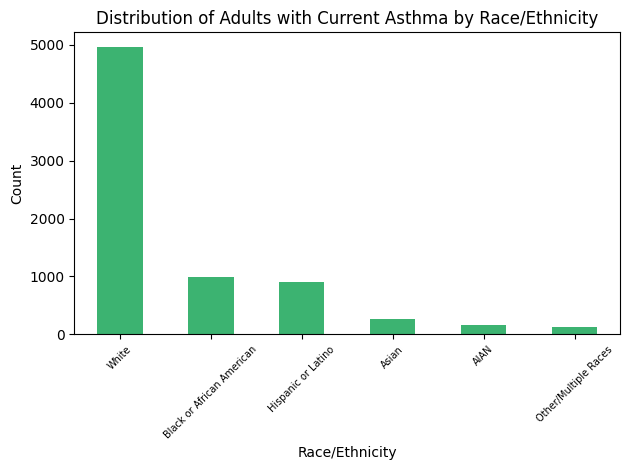

In [ ]:
# Sample distribution of individuals with current asthma by race/ethnicity

print("Total sample size:", len(asthma_data))

print("\nDistribution of Adults with Current Asthma by Race/Ethnicity:\n")
print(asthma_data['RACE_CAT'].value_counts(dropna=False))

# Bar plot for distribution
asthma_data['RACE_CAT'].value_counts(dropna=False).plot(kind = 'bar', color = 'mediumseagreen')
plt.ylabel('Count')
plt.xlabel('Race/Ethnicity')
plt.title('Distribution of Adults with Current Asthma by Race/Ethnicity')
plt.xticks(rotation = 45, fontsize = 7)
plt.tight_layout()
plt.show()

                           No Asthma Attack  Asthma Attack
RACE_CAT                                                  
White                             58.981071      41.018929
Black or African American         65.230461      34.769539
Asian                             61.596958      38.403042
Hispanic or Latino                57.958288      42.041712
AIAN                              43.827160      56.172840
Other/Multiple Races              54.545455      45.454545


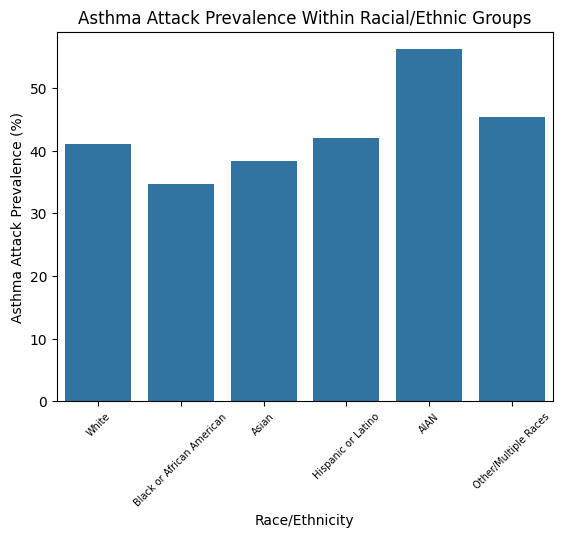

In [ ]:
# Asthma attack prevalence by race/ethnicity
asthma_attack_race = pd.crosstab(asthma_data['RACE_CAT'], asthma_data['ASAT12M_A'], normalize = 'index') * 100
asthma_attack_race.columns = ['No Asthma Attack', 'Asthma Attack']
print(asthma_attack_race)

# Plot asthma attack prevalence by race/ethnicity
sns.barplot(x = asthma_attack_race.index, y = asthma_attack_race['Asthma Attack'])
plt.ylabel('Asthma Attack Prevalence (%)')
plt.xlabel('Race/Ethnicity')
plt.title('Asthma Attack Prevalence Within Racial/Ethnic Groups')
plt.xticks(rotation = 45, fontsize = 7)
plt.show()

                           No Asthma ER Visit  Asthma-Related ER Visit
RACE_CAT                                                              
White                               93.012485                 6.987515
Black or African American           86.072144                13.927856
Asian                               91.634981                 8.365019
Hispanic or Latino                  85.400659                14.599341
AIAN                                83.950617                16.049383
Other/Multiple Races                90.082645                 9.917355


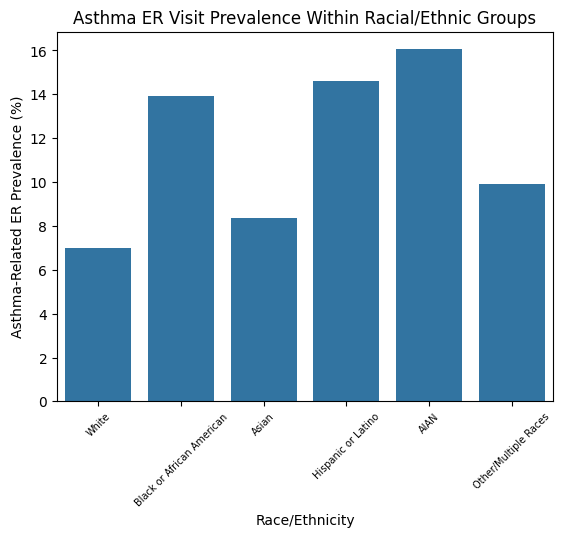

In [ ]:
# Asthma ER visit prevalence by race/ethnicity
asthma_er_race = pd.crosstab(asthma_data['RACE_CAT'], asthma_data['ASER12M_A'], normalize = 'index') * 100
asthma_er_race.columns = ['No Asthma ER Visit', 'Asthma-Related ER Visit']
print(asthma_er_race)

# Plot ER visit prevalence by race/ethnicity
sns.barplot(x = asthma_er_race.index, y = asthma_er_race['Asthma-Related ER Visit'])
plt.ylabel('Asthma-Related ER Prevalence (%)')
plt.xlabel('Race/Ethnicity')
plt.title('Asthma ER Visit Prevalence Within Racial/Ethnic Groups')
plt.xticks(rotation = 45, fontsize = 7)
plt.show()

In [ ]:
# Bivariate analyses: predictors and outcome variables

outcomes = ['ASAT12M_A', 'ASER12M_A']
for outcome in outcomes:
    print(f"\nProportion and prevalence of adults with current asthma who had at least one {outcome} in the past 12m")
    for var in predictors:
      print(f"Adults with current asthma who had at least one {outcome}")
      contingency_table = pd.crosstab(asthma_data[var], asthma_data[outcome], margins = True, margins_name = 'Total')
      print(contingency_table)
      col_percent = pd.crosstab(asthma_data[var], asthma_data[outcome], margins = True, margins_name = 'Total', normalize = 'columns') * 100
      col_percent = col_percent.round(1)
      print("Column Percentages (%)")
      print(col_percent)
      chi2, p, dof, expected = chi2_contingency(contingency_table)
      print(f"Chi-squared statistic: {chi2:.2f}")
      print(f"P-value: {p:.3f}")


Proportion and prevalence of adults with current asthma who had at least one ASAT12M_A in the past 12m
Adults with current asthma who had at least one ASAT12M_A
ASAT12M_A    No   Yes  Total
SEX_A                       
Male       1620   839   2459
Female     2787  2175   4962
Total      4407  3014   7421
Column Percentages (%)
ASAT12M_A    No   Yes  Total
SEX_A                       
Male       36.8  27.8   33.1
Female     63.2  72.2   66.9
Chi-squared statistic: 64.32
P-value: 0.000
Adults with current asthma who had at least one ASAT12M_A
ASAT12M_A                    No   Yes  Total
RACE_CAT                                    
White                      2929  2037   4966
Black or African American   651   347    998
Asian                       162   101    263
Hispanic or Latino          528   383    911
AIAN                         71    91    162
Other/Multiple Races         66    55    121
Total                      4407  3014   7421
Column Percentages (%)
ASAT12M_A               

In [ ]:
# Asthma outcomes by age (continuous variable)

for outcome in outcomes:
    print(f"{outcome}: Age Summary by Asthma Outcomes")
    stats = asthma_data.groupby(outcome)['AGEP_A'].agg(['count', 'mean', 'std']).round(1)
    stats.columns = ['N', 'Mean_age', 'SD_age']
    print(stats)

# Independent t-test and p-values
group0 = asthma_data[asthma_data['ASAT12M_A'] == "Yes"]['AGEP_A'].dropna()
group1 = asthma_data[asthma_data['ASAT12M_A'] == "No"]['AGEP_A'].dropna()

t_stat, p_val = ttest_ind(group0, group1)

print(f"Asthma attack - T-test: t-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")

group2 = asthma_data[asthma_data['ASER12M_A'] == "Yes"]['AGEP_A'].dropna()
group3 = asthma_data[asthma_data['ASER12M_A'] == "No"]['AGEP_A'].dropna()

t_stat, p_val = ttest_ind(group2, group3)

print(f"Asthma-related ER visits - T-test: t-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")


ASAT12M_A: Age Summary by Asthma Outcomes
              N  Mean_age  SD_age
ASAT12M_A                        
No         4407      52.5    18.8
Yes        3014      51.1    17.0
ASER12M_A: Age Summary by Asthma Outcomes
              N  Mean_age  SD_age
ASER12M_A                        
No         6742      52.1    18.2
Yes         679      50.7    17.3
Asthma attack - T-test: t-statistic = -3.38, p-value = 0.0007
Asthma-related ER visits - T-test: t-statistic = -1.84, p-value = 0.0663


/tmp/ipython-input-2528662784.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  asthma_attack_edu_race = asthma_data.groupby(['RACE_CAT', 'EDUCATION_CAT'])['ASAT12M_A'].apply(


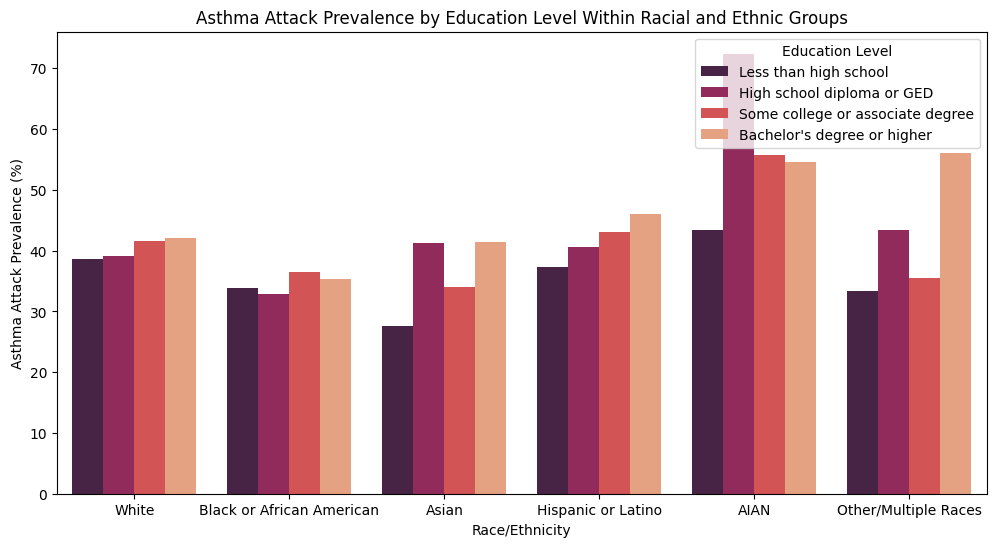

In [ ]:
# Prevalence of asthma attacks by SES within racial/ethnic groups -------------------------------------------

# Calculate the prevalence of asthma attacks by race and education
asthma_attack_edu_race = asthma_data.groupby(['RACE_CAT', 'EDUCATION_CAT'])['ASAT12M_A'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100
).reset_index(name='Prevalence')

# Plot ASAT12M_A prevalence by education and race
plt.figure(figsize=(12, 6))
sns.barplot(x='RACE_CAT', y='Prevalence', hue='EDUCATION_CAT', data = asthma_attack_edu_race, palette = 'rocket')
plt.title('Asthma Attack Prevalence by Education Level Within Racial and Ethnic Groups')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Asthma Attack Prevalence (%)')
plt.legend(title='Education Level', loc='upper right')
plt.show()

/tmp/ipython-input-3502863850.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  asthma_attack_income_race = asthma_data.groupby(['RACE_CAT', 'INCOME_CAT'])['ASAT12M_A'].apply(


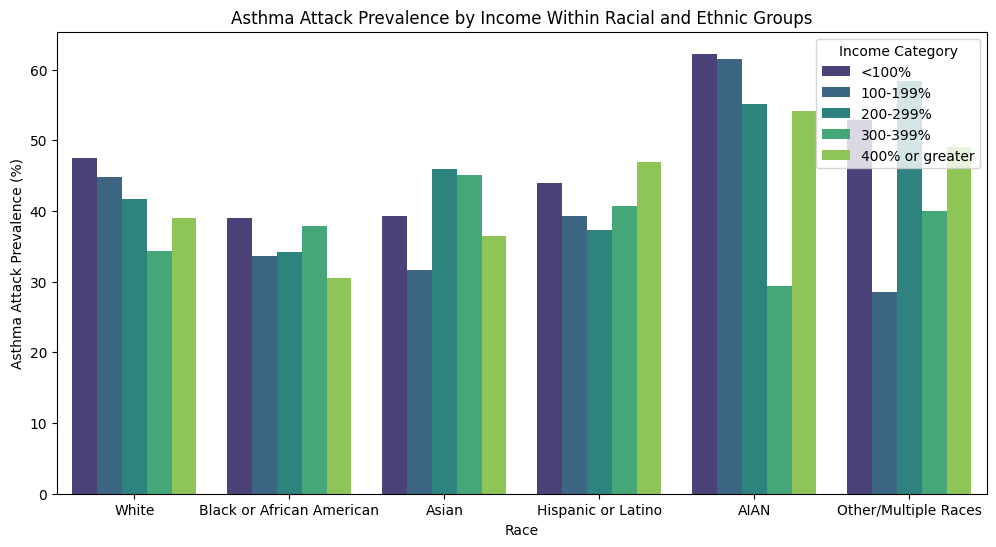

In [ ]:
# Calculate the prevalence of asthma attacks by race and income
asthma_attack_income_race = asthma_data.groupby(['RACE_CAT', 'INCOME_CAT'])['ASAT12M_A'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100
).reset_index(name='Prevalence')

# Plot ASAT12M_A prevalence by income and race
plt.figure(figsize=(12, 6))
sns.barplot(x='RACE_CAT', y='Prevalence', hue='INCOME_CAT', data = asthma_attack_income_race, palette = 'viridis')
plt.title('Asthma Attack Prevalence by Income Within Racial and Ethnic Groups')
plt.xlabel('Race')
plt.ylabel('Asthma Attack Prevalence (%)')
plt.legend(title='Income Category', loc='upper right')
plt.show()

/tmp/ipython-input-1369696131.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  asthma_attack_income_race = asthma_data.groupby(['RACE_CAT', 'FPL_CAT'])['ASAT12M_A'].apply(


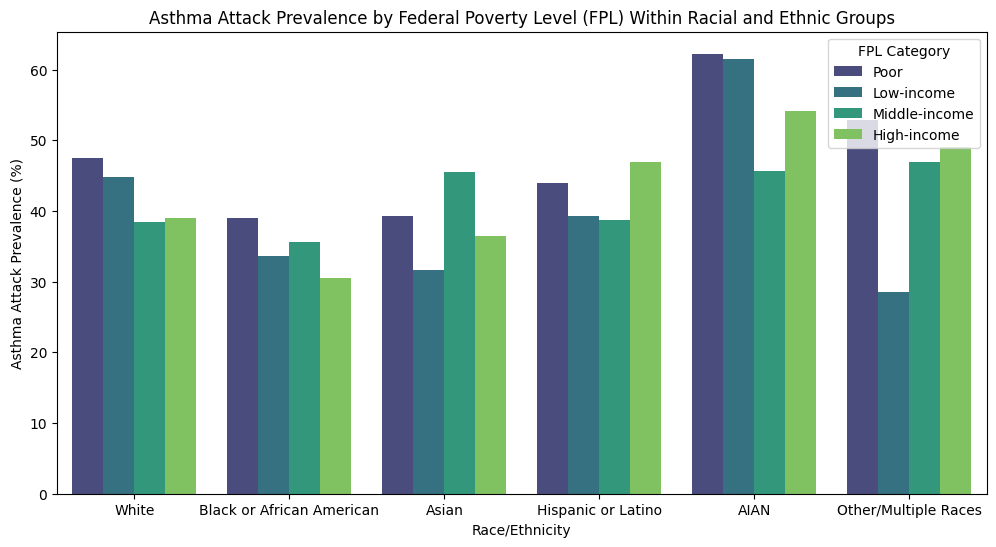

In [ ]:
# Calculate the prevalence of asthma attacks by race and FPL
asthma_attack_income_race = asthma_data.groupby(['RACE_CAT', 'FPL_CAT'])['ASAT12M_A'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100
).reset_index(name='Prevalence')

# Plot ASAT12M_A prevalence by FPL and race
plt.figure(figsize=(12, 6))
sns.barplot(x='RACE_CAT', y='Prevalence', hue='FPL_CAT', data = asthma_attack_income_race, palette = 'viridis')
plt.title('Asthma Attack Prevalence by Federal Poverty Level (FPL) Within Racial and Ethnic Groups')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Asthma Attack Prevalence (%)')
plt.legend(title='FPL Category', loc='upper right')
plt.show()

/tmp/ipython-input-4048048172.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  asthma_attack_cov_race = asthma_data.groupby(['RACE_CAT', 'NOTCOV_A'])['ASAT12M_A'].apply(


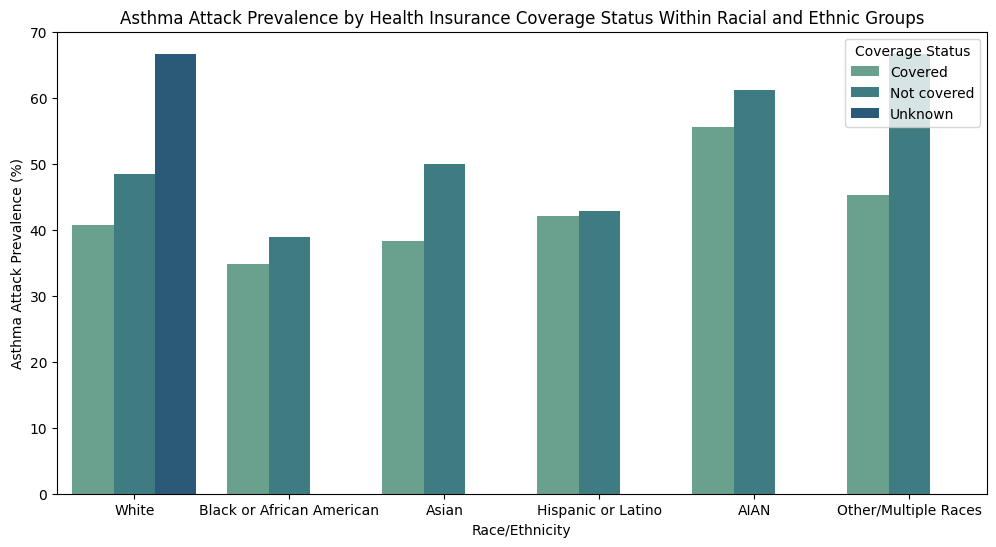

In [ ]:
# Calculate the prevalence of asthma attacks by race and health insurance
asthma_attack_cov_race = asthma_data.groupby(['RACE_CAT', 'NOTCOV_A'])['ASAT12M_A'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100
).reset_index(name='Prevalence')

# Plot ASAT12M_A prevalence by insurance and race
plt.figure(figsize=(12, 6))
sns.barplot(x='RACE_CAT', y='Prevalence', hue='NOTCOV_A', data = asthma_attack_cov_race, palette = 'crest')
plt.title('Asthma Attack Prevalence by Health Insurance Coverage Status Within Racial and Ethnic Groups')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Asthma Attack Prevalence (%)')
plt.legend(title='Coverage Status', loc='upper right')
plt.show()

/tmp/ipython-input-1515074229.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  asthma_er_edu_race = asthma_data.groupby(['RACE_CAT', 'EDUCATION_CAT'])['ASER12M_A'].apply(


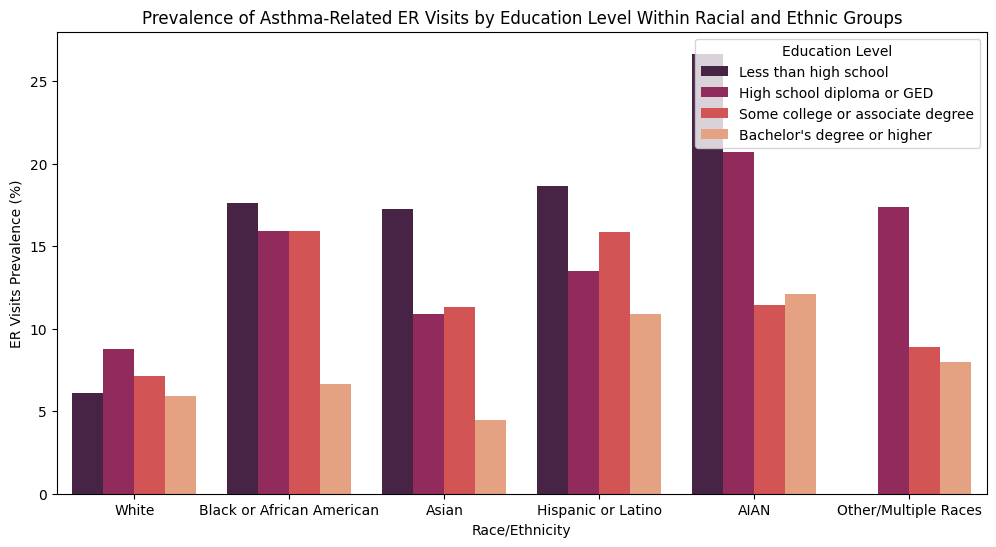

In [ ]:
# Prevalence of asthma-related ER visits by SES within racial/ethnic groups -------------------------------------------

# Calculate the prevalence of asthma ER visits by race and education
asthma_er_edu_race = asthma_data.groupby(['RACE_CAT', 'EDUCATION_CAT'])['ASER12M_A'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100
).reset_index(name='Prevalence')

# Plot ASAT12M_A prevalence by education and race
plt.figure(figsize=(12, 6))
sns.barplot(x='RACE_CAT', y='Prevalence', hue='EDUCATION_CAT', data = asthma_er_edu_race, palette = 'rocket')
plt.title('Prevalence of Asthma-Related ER Visits by Education Level Within Racial and Ethnic Groups')
plt.xlabel('Race/Ethnicity')
plt.ylabel('ER Visits Prevalence (%)')
plt.legend(title='Education Level', loc='upper right')
plt.show()

/tmp/ipython-input-3765095002.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  asthma_er_income_race = asthma_data.groupby(['RACE_CAT', 'INCOME_CAT'])['ASER12M_A'].apply(


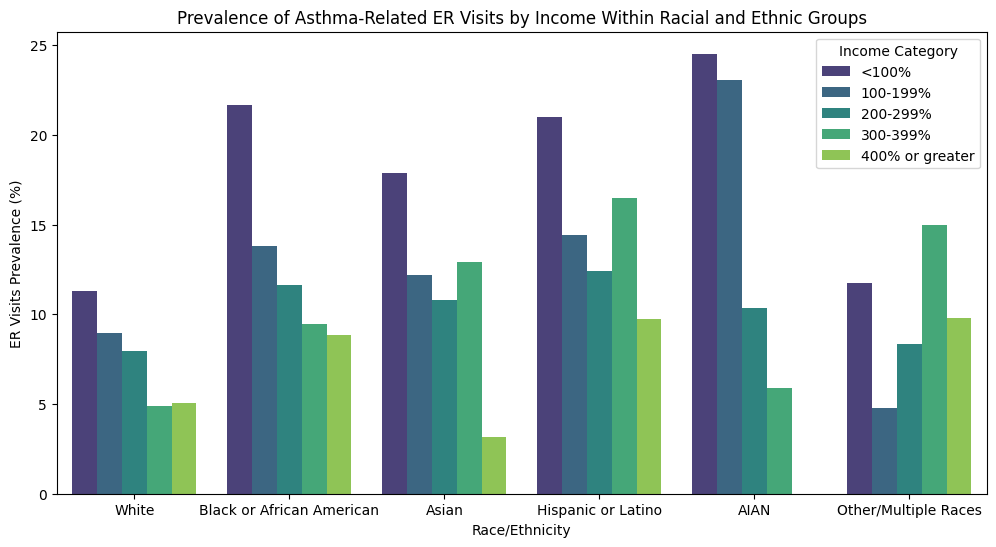

In [ ]:
# Calculate the prevalence of asthma ER visits by race and income
asthma_er_income_race = asthma_data.groupby(['RACE_CAT', 'INCOME_CAT'])['ASER12M_A'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100
).reset_index(name='Prevalence')

# Plot ASAT12M_A prevalence by income and race
plt.figure(figsize=(12, 6))
sns.barplot(x='RACE_CAT', y='Prevalence', hue='INCOME_CAT', data = asthma_er_income_race, palette = 'viridis')
plt.title('Prevalence of Asthma-Related ER Visits by Income Within Racial and Ethnic Groups')
plt.xlabel('Race/Ethnicity')
plt.ylabel('ER Visits Prevalence (%)')
plt.legend(title='Income Category', loc='upper right')
plt.show()

/tmp/ipython-input-154637983.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  asthma_er_cov_race = asthma_data.groupby(['RACE_CAT', 'NOTCOV_A'])['ASER12M_A'].apply(


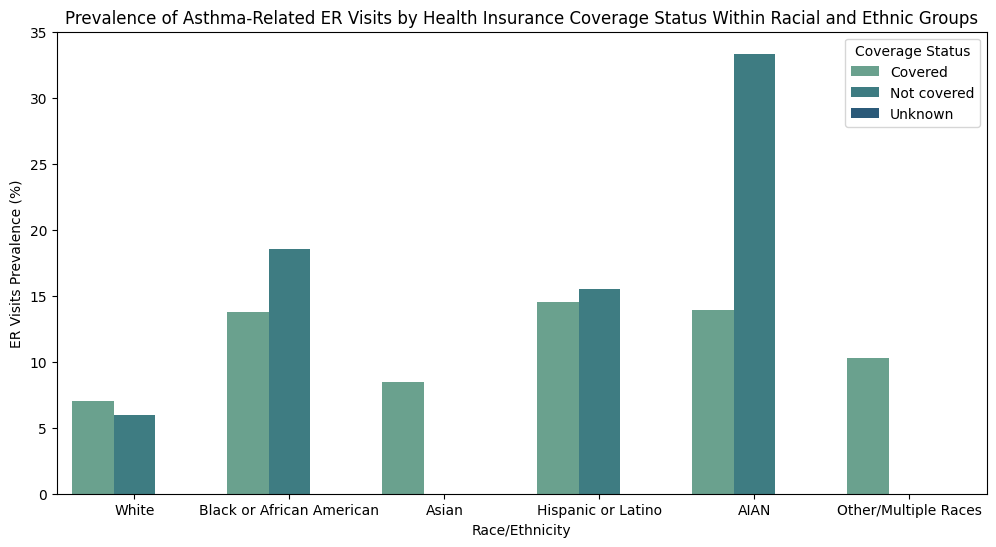

In [ ]:
# Calculate the prevalence of asthma ER visits by race and health insurance
asthma_er_cov_race = asthma_data.groupby(['RACE_CAT', 'NOTCOV_A'])['ASER12M_A'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100
).reset_index(name='Prevalence')

# Plot ASAT12M_A prevalence by insurance and race
plt.figure(figsize=(12, 6))
sns.barplot(x='RACE_CAT', y='Prevalence', hue='NOTCOV_A', data = asthma_er_cov_race, palette = 'crest')
plt.title('Prevalence of Asthma-Related ER Visits by Health Insurance Coverage Status Within Racial and Ethnic Groups')
plt.xlabel('Race/Ethnicity')
plt.ylabel('ER Visits Prevalence (%)')
plt.legend(title='Coverage Status', loc='upper right')
plt.show()

In [ ]:
# Logistic regression analysis: asthma attack

# Convert outcome to binary
asthma_data['asthma_attack_binary'] = asthma_data['ASAT12M_A'].map({'Yes': 1, 'No': 0})

# Log reg: asthma attack and race with unadjusted odds ratios
unadj_model_race = logit('asthma_attack_binary ~ C(RACE_CAT, Treatment(reference = "White"))', data = asthma_data).fit()
print(unadj_model_race.summary())

conf_race = unadj_model_race.conf_int()
conf_race['OR'] = unadj_model_race.params
conf_race.columns = ['Lower CI', 'Upper CI', 'OR']
print(np.exp(conf_race))

# Log reg: asthma attack and SES variables with unadjusted odds ratios
unadj_model_edu = logit('asthma_attack_binary ~ C(EDUCATION_CAT, Treatment(reference = "Some college or associate degree"))', data = asthma_data).fit()
print(unadj_model_edu.summary())

conf_edu = unadj_model_edu.conf_int()
conf_edu['OR'] = unadj_model_edu.params
conf_edu.columns = ['Lower CI', 'Upper CI', 'OR']
print(np.exp(conf_edu))

unadj_model_fpl = logit('asthma_attack_binary ~ C(FPL_CAT, Treatment(reference = "High-income"))', data = asthma_data).fit()
print(unadj_model_fpl.summary())

conf_fpl = unadj_model_fpl.conf_int()
conf_fpl['OR'] = unadj_model_fpl.params
conf_fpl.columns = ['Lower CI', 'Upper CI', 'OR']
print(np.exp(conf_fpl))

unadj_model_employ = logit('asthma_attack_binary ~ C(EMPLOYMENT_CAT, Treatment(reference = "Employed"))', data = asthma_data).fit()
print(unadj_model_employ.summary())

conf_emp = unadj_model_employ.conf_int()
conf_emp['OR'] = unadj_model_employ.params
conf_emp.columns = ['Lower CI', 'Upper CI', 'OR']
print(np.exp(conf_emp))

unadj_model_ins = logit('asthma_attack_binary ~ C(NOTCOV_A, Treatment(reference = "Covered"))', data = asthma_data).fit()
print(unadj_model_ins.summary())

conf_ins = unadj_model_ins.conf_int()
conf_ins['OR'] = unadj_model_ins.params
conf_ins.columns = ['Lower CI', 'Upper CI', 'OR']
print(np.exp(conf_ins))


Optimization terminated successfully.
         Current function value: 0.673196
         Iterations 4
                            Logit Regression Results                            
Dep. Variable:     asthma_attack_binary   No. Observations:                 7421
Model:                            Logit   Df Residuals:                     7415
Method:                             MLE   Df Model:                            5
Date:                  Mon, 11 Aug 2025   Pseudo R-squ.:                0.003300
Time:                          01:45:29   Log-Likelihood:                -4995.8
converged:                         True   LL-Null:                       -5012.3
Covariance Type:              nonrobust   LLR p-value:                 3.631e-06
                                                                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------

In [ ]:
# Multivariable logistic regression analysis: asthma attack

# Log reg:  asthma attack and predictors with adjusted odds ratios
adj_model_race = logit('asthma_attack_binary ~ C(RACE_CAT, Treatment(reference = "White")) + AGEP_A + C(SEX_A, Treatment(reference = "Male")) + C(EDUCATION_CAT, Treatment(reference = "Some college or associate degree")) + C(FPL_CAT, Treatment(reference = "High-income")) + C(EMPLOYMENT_CAT, Treatment(reference = "Employed")) + C(NOTCOV_A, Treatment(reference = "Covered"))', data = asthma_data).fit()
print(adj_model_race.summary())

conf_race_adj = adj_model_race.conf_int()
conf_race_adj['OR'] = adj_model_race.params
conf_race_adj.columns = ['Lower CI', 'Upper CI', 'OR']
print(np.exp(conf_race_adj))

Optimization terminated successfully.
         Current function value: 0.665183
         Iterations 5
                            Logit Regression Results                            
Dep. Variable:     asthma_attack_binary   No. Observations:                 7421
Model:                            Logit   Df Residuals:                     7404
Method:                             MLE   Df Model:                           16
Date:                  Mon, 11 Aug 2025   Pseudo R-squ.:                 0.01516
Time:                          02:10:28   Log-Likelihood:                -4936.3
converged:                         True   LL-Null:                       -5012.3
Covariance Type:              nonrobust   LLR p-value:                 3.137e-24
                                                                                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

In [ ]:
# Logistic regression analysis: asthma ER visits

# Convert outcome to binary
asthma_data['asthma_er_binary'] = asthma_data['ASER12M_A'].map({'Yes': 1, 'No': 0})

# Log reg: asthma ER visits and race with unadjusted odds ratio
unadj_model_race2 = logit('asthma_er_binary ~ C(RACE_CAT, Treatment(reference = "White"))', data = asthma_data).fit()
print(unadj_model_race2.summary())

conf_race2 = unadj_model_race2.conf_int()
conf_race2['OR'] = unadj_model_race2.params
conf_race2.columns = ['Lower CI', 'Upper CI', 'OR']
print(np.exp(conf_race2))

# Log reg: asthma ER visits and SES variables with unadjusted odds ratios
unadj_model_edu2 = logit('asthma_er_binary ~ C(EDUCATION_CAT, Treatment(reference = "Some college or associate degree"))', data = asthma_data).fit()
print(unadj_model_edu2.summary())

conf_edu2 = unadj_model_edu2.conf_int()
conf_edu2['OR'] = unadj_model_edu2.params
conf_edu.columns = ['Lower CI', 'Upper CI', 'OR']
print(np.exp(conf_edu2))

unadj_model_income2 = logit('asthma_er_binary ~ C(FPL_CAT, Treatment(reference = "High-income"))', data = asthma_data).fit()
print(unadj_model_income2.summary())

conf_inc2 = unadj_model_income2.conf_int()
conf_inc2['OR'] = unadj_model_income2.params
conf_inc2.columns = ['Lower CI', 'Upper CI', 'OR']
print(np.exp(conf_inc2))

unadj_model_employ2 = logit('asthma_er_binary ~ C(EMPLOYMENT_CAT, Treatment(reference = "Employed"))', data = asthma_data).fit()
print(unadj_model_employ2.summary())

conf_emp2 = unadj_model_employ2.conf_int()
conf_emp2['OR'] = unadj_model_employ2.params
conf_emp2.columns = ['Lower CI', 'Upper CI', 'OR']
print(np.exp(conf_emp2))

unadj_model_ins2 = logit('asthma_er_binary ~ C(NOTCOV_A, Treatment(reference = "Covered"))', data = asthma_data).fit()
print(unadj_model_ins2.summary())

conf_ins2 = unadj_model_ins2.conf_int()
conf_ins2['OR'] = unadj_model_ins2.params
conf_ins2.columns = ['Lower CI', 'Upper CI', 'OR']
print(np.exp(conf_ins2))


Optimization terminated successfully.
         Current function value: 0.299909
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:       asthma_er_binary   No. Observations:                 7421
Model:                          Logit   Df Residuals:                     7415
Method:                           MLE   Df Model:                            5
Date:                Mon, 11 Aug 2025   Pseudo R-squ.:                 0.01987
Time:                        02:23:42   Log-Likelihood:                -2225.6
converged:                       True   LL-Null:                       -2270.7
Covariance Type:            nonrobust   LLR p-value:                 6.010e-18
                                                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


In [ ]:
# Multivariable logistic regression analysis: asthma ER visits

# Log reg:  asthma er and predictors with adjusted odds ratios
adj_model_race2 = logit('asthma_er_binary ~ C(RACE_CAT, Treatment(reference = "White")) + AGEP_A + C(SEX_A, Treatment(reference = "Male")) + C(EDUCATION_CAT, Treatment(reference = "Some college or associate degree")) + C(FPL_CAT, Treatment(reference = "High-income")) + C(EMPLOYMENT_CAT, Treatment(reference = "Employed")) + C(NOTCOV_A, Treatment(reference = "Covered"))', data = asthma_data).fit()
print(adj_model_race2.summary())

conf_race_adj2 = adj_model_race2.conf_int()
conf_race_adj2['OR'] = adj_model_race2.params
conf_race_adj2.columns = ['Lower CI', 'Upper CI', 'OR']
print(np.exp(conf_race_adj2))

         Current function value: 0.293600
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:       asthma_er_binary   No. Observations:                 7421
Model:                          Logit   Df Residuals:                     7404
Method:                           MLE   Df Model:                           16
Date:                Mon, 11 Aug 2025   Pseudo R-squ.:                 0.04048
Time:                        02:34:35   Log-Likelihood:                -2178.8
converged:                      False   LL-Null:                       -2270.7
Covariance Type:            nonrobust   LLR p-value:                 1.417e-30
                                                                                                               coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)
